In [1]:
from scipy.stats import norm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import squarify    # pip install squarify (algorithm for treemap)
from matplotlib.gridspec import GridSpec
from sklearn.linear_model import LogisticRegression

---

In [2]:
def plot_notmal_logistica_e_ROC(prop, pop, doente_mu, saudavel_mu, doente_sigma, saudavel_sigma):
  n_doentes = int(pop*prop)
  n_saldaveis = int(pop*(1-prop))


  threshold_points = 21


  df = pd.DataFrame()
  df['doente'] = pd.Series([0]*n_saldaveis + [1]*n_doentes)

  df['anticorpos'] = norm.rvs(loc=saudavel_mu, scale=saudavel_sigma, size=pop, random_state=None)
  df['anticorpos'][df.doente==1] = norm.rvs(loc=doente_mu, scale=doente_sigma, size=n_doentes, random_state=None)

  fig = plt.figure(figsize=(18,15))
  gs = GridSpec(ncols=2, nrows=2)
  plot1 = fig.add_subplot(gs[0, 0])
  plot2 = fig.add_subplot(gs[0, 1])
  plot3 = fig.add_subplot(gs[1, 0])
  plot4 = fig.add_subplot(gs[1, 1])

  sns.histplot(x=df.anticorpos, hue=df.doente, kde=True, ax=plot1).set_title("distribuição da concentração de anticorpos")

  X = df[['anticorpos']]
  y = df['doente']
  clf = LogisticRegression().fit(X, y)
  y_proba = clf.predict_proba(X)

  sns.histplot(x=y_proba[:,1], hue=df.doente, kde=False, ax=plot2).set_title("distribuição da prob. de testar positivo\n= histplot(y_proba[:,1])")

  normal_thresholds = np.linspace(saudavel_mu-2*saudavel_sigma, doente_mu+2*doente_sigma, threshold_points)
  TVPs = []
  TFPs = []
  for threshold in normal_thresholds:
    df['previsao_normal'] = df['anticorpos']>threshold
    df['previsao_normal'] = df['previsao_normal'].map(int)

    vp = df[(df.doente==1)&(df.previsao_normal==1)].shape[0]
    vn = df[(df.doente==0)&(df.previsao_normal==0)].shape[0]
    fp = df[(df.doente==0)&(df.previsao_normal==1)].shape[0]
    fn = df[(df.doente==1)&(df.previsao_normal==0)].shape[0]

    TVPs += [vp/(vp+fn)]
    TFPs += [fp/(vn+fp)]

  normal_coefs_df = pd.DataFrame()
  normal_coefs_df['TVP'] = TVPs
  normal_coefs_df['TFP'] = TFPs
  normal_coefs_df['normal_thresholds'] = normal_thresholds
  normal_coefs_df.set_index('normal_thresholds', inplace=True)

  plot3.scatter(normal_coefs_df['TFP'], normal_coefs_df['TVP'], s=50, c=normal_coefs_df.index, cmap='gray')
  for threshold in normal_thresholds[::10]:
    plot3.annotate(f'{threshold:.2f}', (normal_coefs_df['TFP'][threshold], normal_coefs_df['TVP'][threshold]))
  plot3.plot(normal_coefs_df['TFP'], normal_coefs_df['TVP'])
  plot3.set_xlabel("TFP")
  plot3.set_ylabel("TVP")
  plot3.set_title("ROC")








  logistic_thresholds = np.linspace(0,1,threshold_points)
  TVPs = []
  TFPs = []

  for threshold in logistic_thresholds:
    df['previsao_logistica'] = y_proba[:,1]>threshold
    df['previsao_logistica'] = df['previsao_logistica'].map(int)

    vp = df[(df.doente==1)&(df.previsao_logistica==1)].shape[0]
    vn = df[(df.doente==0)&(df.previsao_logistica==0)].shape[0]
    fp = df[(df.doente==0)&(df.previsao_logistica==1)].shape[0]
    fn = df[(df.doente==1)&(df.previsao_logistica==0)].shape[0]

    TVPs += [vp/(vp+fn)]
    TFPs += [fp/(vn+fp)]

  logistic_coefs_df = pd.DataFrame()
  logistic_coefs_df['TVP'] = TVPs
  logistic_coefs_df['TFP'] = TFPs
  logistic_coefs_df['logistic_thresholds'] = logistic_thresholds
  logistic_coefs_df.set_index('logistic_thresholds', inplace=True)
  # logistic_coefs_df

  # sns.lineplot(x=logistic_coefs_df['TFP'], y=logistic_coefs_df['TVP'], ax=plot3, marker="o").set_title("ROC")
  # plot3.set(xlabel='TFP', ylabel='TPV')

  plot4.scatter(logistic_coefs_df['TFP'], logistic_coefs_df['TVP'], s=50, c=logistic_coefs_df.index, cmap='gray')
  for threshold in logistic_thresholds[::10]:
    plot4.annotate(f'{threshold:.2f}', (logistic_coefs_df['TFP'][threshold], logistic_coefs_df['TVP'][threshold]))
  plot4.plot(logistic_coefs_df['TFP'], logistic_coefs_df['TVP'])
  plot4.set_xlabel("TFP")
  plot4.set_ylabel("TVP")
  plot4.set_title("ROC")




<ipython-input-2-adb44a7f39f6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anticorpos'][df.doente==1] = norm.rvs(loc=doente_mu, scale=doente_sigma, size=n_doentes, random_state=None)


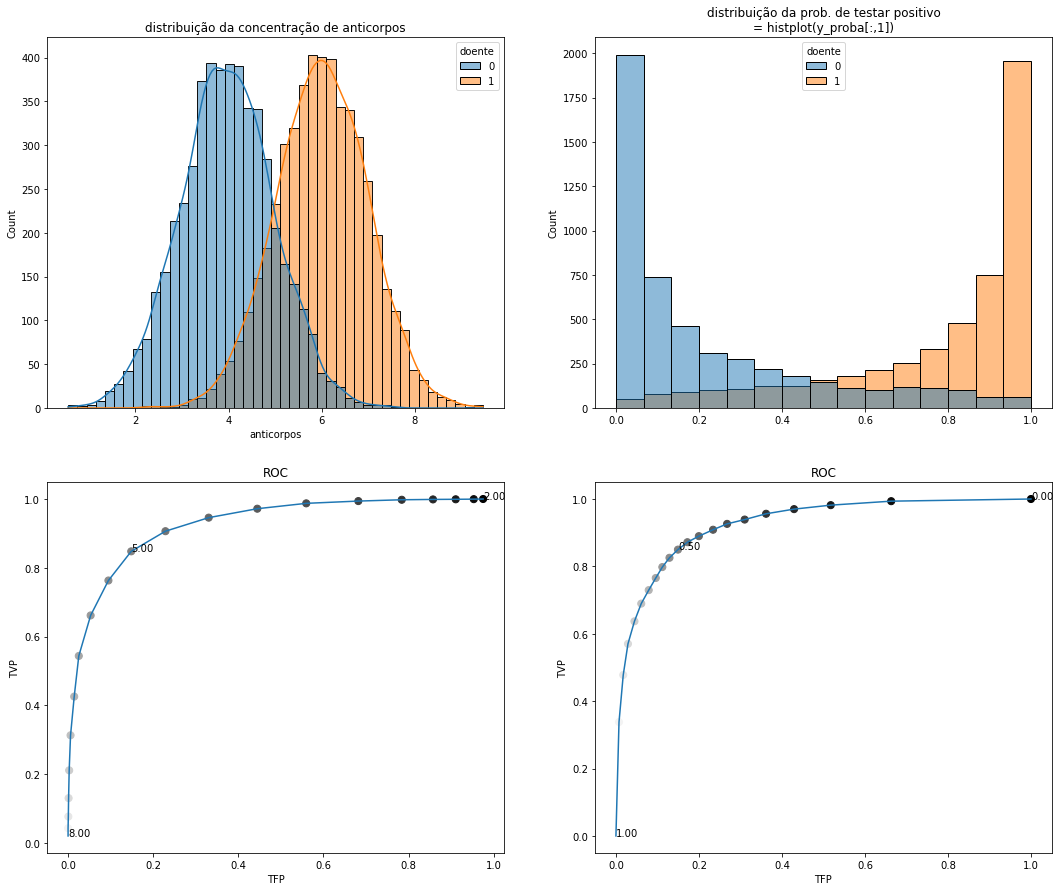

In [3]:
plot_notmal_logistica_e_ROC(prop=0.5, pop=10_000, doente_mu=6, saudavel_mu=4, doente_sigma=1, saudavel_sigma=1)

### Se o teste fosse "melhor" e as normais fossem mais separadas:

<ipython-input-2-adb44a7f39f6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anticorpos'][df.doente==1] = norm.rvs(loc=doente_mu, scale=doente_sigma, size=n_doentes, random_state=None)


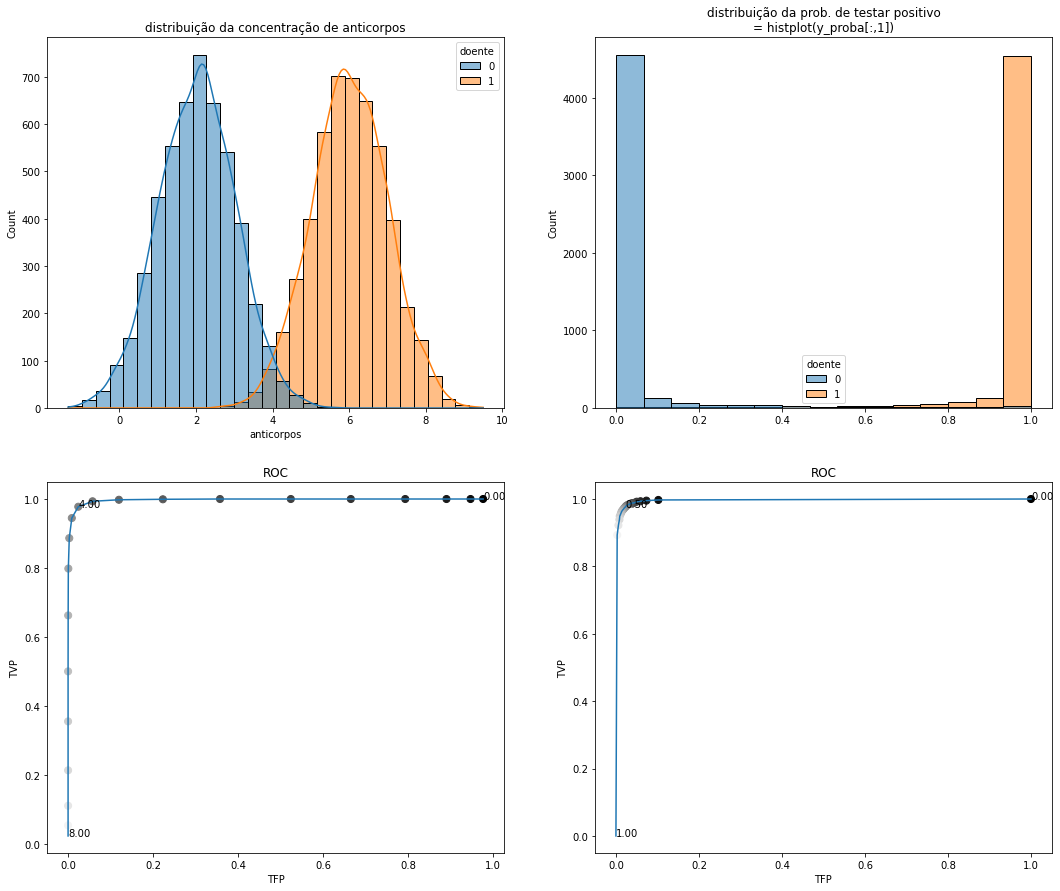

In [4]:
plot_notmal_logistica_e_ROC(prop=0.5, pop=10_000, doente_mu=6, saudavel_mu=2, doente_sigma=1, saudavel_sigma=1)

- A ROC se aproxima do ideal

---
---
---

In [5]:
def plot_tree_maps(P_vn, P_fp, P_fn, P_vp, plot1, plot2, plot3, plot4, plot5):

  def stringfy(num):
    if (num>1000000):
      return f"{num/1000000:.1f}MM"
    if (num>1000):
      return f"{num/1000:.0f}M"
    return f"{int(num)}"
  
  def percentify(df):
    total = df['size'].sum()
    df['percent'] = round(100*df['size']/total,1)
    df['percent'] = df['percent'].map(str)
  
  def create_label(df):
    percentify(df)
    return df['percent']+'% '+df['label']

  VN = int(P_vn * 200_000_000)
  FP = int(P_fp * 200_000_000)
  FN = int(P_fn * 200_000_000)
  VP = int(P_vp * 200_000_000)

  df_square = pd.DataFrame({
    'size':[VN,FP,VP,FN],
    'label':[f"VN\n{stringfy(VN)}", f"FP\n{stringfy(FP)}", f"VP\n{stringfy(VP)}", f"FN\n{stringfy(FN)}"],
    # 'color':["green","darkorange","indianred", "darkred"],
    'color':["green","blue","orange", "red"],
    'type':['VN','FP','VP','FN']
  })

  alpha = .5


  positive_test_mask = ((df_square['type']=='VP') | (df_square['type']=='FP'))
  negative_test_mask = (~positive_test_mask)
  diseased_mask = ((df_square['type']=='VP') | (df_square['type']=='FN'))
  not_diseased_mask = (~diseased_mask)

  # Todos os grupos
  plot1.axis('off')
  plot1.set_title('População toda')
  squarify.plot(sizes=df_square['size'], label=create_label(df_square), color=df_square['color'], alpha=alpha, ax=plot1)

  # Apenas testes positivos
  plot2.axis('off')
  plot2.set_title('Testes positivos (precisão)')
  df_temp = df_square[positive_test_mask].copy()
  squarify.plot(sizes=df_temp['size'], label=create_label(df_temp), color=df_temp['color'], alpha=alpha, ax=plot2)

  # Apenas testes negativos
  plot3.axis('off')
  plot3.set_title('Testes negativos')
  df_temp = df_square[negative_test_mask].copy()
  squarify.plot(sizes=df_temp['size'], label=create_label(df_temp), color=df_temp['color'], alpha=alpha, ax=plot3)

  # Apenas pessoas doentes
  plot4.axis('off')
  plot4.set_title('Doentes (sensibilidade/TVP)')
  df_temp = df_square[diseased_mask].copy()
  squarify.plot(sizes=df_temp['size'], label=create_label(df_temp), color=df_temp['color'], alpha=alpha, ax=plot4)

  # Apenas pessoas saudáveis
  plot5.axis('off')
  plot5.set_title('Saudáveis (especificidade/~TFP)')
  df_temp = df_square[not_diseased_mask].copy()
  squarify.plot(sizes=df_temp['size'], label=create_label(df_temp), color=df_temp['color'], alpha=alpha, ax=plot5)

In [6]:
# formata float como % com 2 casas decimais
def percentify(val):
    return f'{100*val:.2f}%'

# Discretização do eixo X
xs_glob = list(np.linspace(0,12,100))

def plot_pdfs(mu_doente, sigma_doente, mu_saudavel, sigma_saudavel, prop, threshold, fill_positives=False, title=None):

    # Truque pra usar menos pontos e mesmo assim hachurar a área bonitinho
    xs = pd.Series([threshold-0.001,threshold+0.001]+xs_glob).sort_values()

    threshold_index = np.where(xs>threshold)[0][0]
    fig = plt.figure(figsize=(22,12))
    if title:
        fig.suptitle(title, fontsize=20)
    gs = GridSpec(ncols=5, nrows=5, hspace=.4, height_ratios=[2,1,1,.5,2])
    plot = fig.add_subplot(gs[0:2,:4])
    matrix = fig.add_subplot(gs[0,4:])
    coefs = fig.add_subplot(gs[2,:4])
    roc_plot = fig.add_subplot(gs[1:3,4:])
    bayes_text = fig.add_subplot(gs[3,:])

    # text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
    bayes_text.text(0.5, 0.5, 'Analises Bayesianas:', ha='center', va='center', fontsize=28)
    bayes_text.tick_params(
        # axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft = False,
        left=False,
        labelbottom=False) # labels along the bottom edge are off
    for sp in bayes_text.spines.values():
        sp.set_visible(False)
    
    plot1 = fig.add_subplot(gs[4,0])
    plot2 = fig.add_subplot(gs[4,1])
    plot3 = fig.add_subplot(gs[4,2])
    plot4 = fig.add_subplot(gs[4,3])
    plot5 = fig.add_subplot(gs[4,4])
    
    # valores da PDF para os DOENTES
    y1s = norm.pdf(xs, loc=mu_doente, scale=sigma_doente)*prop
    plot.plot(xs, y1s, label="Distribuição doentes", color='darkorange')
    # hachurar os falsos negativos
    falsos_negativos = np.array((list(y1s[:threshold_index]) + list([0.0]*(len(xs)-threshold_index))))
    plot.fill_between(xs, falsos_negativos, alpha=0.5, label="Prob. falsos negativos", color='red')
    
    # valores da PDF para os NÃO DOENTES
    y2s = norm.pdf(xs, loc=mu_saudavel, scale=sigma_saudavel)*(1-prop)
    plot.plot(xs, y2s, label="Distribuição saudáveis", color='darkgreen')
    # hachurar os falsos positivos
    falsos_positivos = np.array((list([0.0]*threshold_index) + list(y2s[threshold_index:])))
    plot.fill_between(xs, falsos_positivos, alpha=0.5, label="Prob. falsos positivos", color='blue')

    if fill_positives:
        # hachurar os verdadeiros positivos
        verdadeiros_positivos = np.array((list([0.0]*threshold_index) + list(y1s[threshold_index:])))
        plot.fill_between(xs, verdadeiros_positivos, alpha=1, label="Prob. verdadeiros positivos", facecolor="none", edgecolor='darkorange',hatch="//")

        # hachurar os verdadeiros negativos
        verdadeiros_negativos = np.array((list(y2s[:threshold_index]) + list([0.0]*(len(xs)-threshold_index))))
        plot.fill_between(xs, verdadeiros_negativos, alpha=1, label="Prob. verdadeiros positivos", facecolor="none", edgecolor='green',hatch="\\\\")
    
    # linha vertical de limiar/threshold
    plot.axvline(threshold, 0, 1, color='black', alpha=200, label="Threshold ou Limiar [positivos | negativos]")
    
    # legendas
    plot.legend()

    # fig.title("Distribuições das respostas ao teste")
    
    # Cálculo das probabilidades
    P_vp = norm.sf(xs[threshold_index], loc=mu_doente, scale=sigma_doente)*prop      # verdadeiro positivo
    P_fn = norm.cdf(xs[threshold_index], loc=mu_doente, scale=sigma_doente)*prop       # falso positivo
    P_vn = norm.cdf(xs[threshold_index], loc=mu_saudavel, scale=sigma_saudavel)*(1-prop)   # verdadeiro negativo
    P_fp = norm.sf(xs[threshold_index], loc=mu_saudavel, scale=sigma_saudavel)*(1-prop)  # falso negativo
    
    # Criando matriz de confusão
    df_conf = pd.DataFrame()
    df_conf['Teste negativo'] = [P_vn,P_fn]
    df_conf['Teste positivo'] = [P_fp,P_vp]
    df_conf['idx'] = ['Não doente','Doente']
    df_conf.set_index('idx',inplace=True)

    sns.heatmap(df_conf, annot=True, ax=matrix, cmap="Blues")

    # Construção da matriz de confusão
    d = [
        {'Real':'Positivo', 'Teste positivo':percentify(P_vp), 'Teste negativo':percentify(P_fn), '  % da pop.':percentify(P_vp+P_fn)},
        {'Real':'Negativo', 'Teste positivo':percentify(P_fp), 'Teste negativo':percentify(P_vn), '  % da pop.':percentify(P_fp+P_vn)},
        {'Real':'% da pop.', 'Teste positivo':percentify(P_vp+P_fp), 'Teste negativo':percentify(P_fn+P_vn), '  % da pop.':percentify(P_vp+P_fn+P_fp+P_vn)}
    ]
    print(pd.DataFrame(d).set_index('Real'))
    print('-'*100)
    
    # Cálculo dos indicadores de qualidade do teste
    sensitivity = P_vp/(P_vp+P_fn)    # prob. de classificar corretamente alguém como positivo
    specificity = P_vn/(P_vn+P_fp)    # prob. de classificar corretamente alguém como negativo
    PPV = P_vp/(P_vp+P_fp)            # prob. de ser positivo dado que o teste deu positivo
    NPV = P_vn/(P_vn+P_fn)            # prob. de ser negativo dado que o teste deu negativo
    print(f"Precision/PPV: {100*PPV:.2f}%   NPV: {100*NPV:.2f}%   sensitivity: {100*sensitivity:.2f}%   specificity: {100*specificity:.2f}%")


    precisao = P_vp/(P_vp+P_fp)
    sensibilidade = P_vp/(P_vp+P_fn)
    especificidade = P_vn/(P_vn+P_fp)
    TFP = P_fp/(P_vn+P_fp)
    df_coefs = pd.DataFrame()
    df_coefs['precisao'] = [precisao]
    df_coefs['especificidade'] = [especificidade]
    df_coefs['sensibilidade / TVP'] = [sensibilidade]
    df_coefs['TFP'] = [TFP]
    sns.heatmap(df_coefs, annot=True, ax=coefs, cmap="Blues")


    df_roc = pd.DataFrame()
    df_roc['thresholds'] = np.linspace(-3,13,100)

    df_roc['P_vp'] = norm.sf(df_roc['thresholds'], loc=mu_doente, scale=sigma_doente)*prop      # verdadeiro positivo
    df_roc['P_fn'] = norm.cdf(df_roc['thresholds'], loc=mu_doente, scale=sigma_doente)*prop       # falso positivo
    df_roc['P_vn'] = norm.cdf(df_roc['thresholds'], loc=mu_saudavel, scale=sigma_saudavel)*(1-prop)   # verdadeiro negativo
    df_roc['P_fp'] = norm.sf(df_roc['thresholds'], loc=mu_saudavel, scale=sigma_saudavel)*(1-prop)  # falso negativo
    df_roc['TVP'] = df_roc['P_vp']/(df_roc['P_vp']+df_roc['P_fn'])
    df_roc['TFP'] = df_roc['P_fp']/(df_roc['P_vn']+df_roc['P_fp'])
    
    # sns.lineplot(x=df_roc['TFP'],y=df_roc['TVP'], ax=roc_plot)
    roc_plot.plot(df_roc['TFP'],df_roc['TVP'], marker='x')
    roc_plot.set_title('ROC')

    # Labels
    roc_plot.set_xlabel("TFP")
    roc_plot.set_ylabel("TVP")

    # Limites
    lim_inf = -0.1
    lim_sup = 1.1
    roc_plot.set_xlim(lim_inf, lim_sup)
    roc_plot.set_ylim(lim_inf, lim_sup)

    # tracejados da caixa
    if(lim_inf<0 and lim_sup>1):
        roc_plot.plot([0, 0], [lim_inf, lim_sup], linestyle="--", alpha=0.5, color='#888888')
        roc_plot.plot([1, 1], [lim_inf, lim_sup], linestyle="--", alpha=0.5, color='#888888')
        roc_plot.plot([lim_inf, lim_sup], [0, 0], linestyle="--", alpha=0.5, color='#888888')
        roc_plot.plot([lim_inf, lim_sup], [1, 1], linestyle="--", alpha=0.5, color='#888888')

    # ponto
    x_p = df_coefs['TFP'][0]
    y_p = df_coefs['sensibilidade / TVP'][0]
    roc_plot.scatter(x_p, y_p)

    # ticks 
    ticks = []
    roc_plot.set_xticks(ticks+[df_coefs['TFP'][0]])
    roc_plot.set_yticks(ticks+[df_coefs['sensibilidade / TVP'][0]])

    # linhas guia
    roc_plot.plot([x_p, x_p], [lim_inf, y_p], linestyle="--", alpha=0.75, color='#000000')
    roc_plot.plot([lim_inf, x_p], [y_p, y_p], linestyle="--", alpha=0.75, color='#000000')



    # Treemaps
    plot_tree_maps(P_vn, P_fp, P_fn, P_vp, plot1, plot2, plot3, plot4, plot5)

# Imagine que você precisa testar a população do seu país para uma doença...

  >- O teste é feito medindo a concentração de fragmentos de DNA que se apresntam mais no código genético do vírus do que no humano. Espera-se distribuições normais para as concentrações desse DNA na população, porém as pessoas doentes apresentarão uma concentração média mais elevada do que as saudáveis
 <div></div>
 
  >- É possível fazer testes muito melhores analizando mais DNA, porém encarece o processo e inviabiliza que todos sejam testados. Esse teste "melhor" se refletiria numa melhor separação entre as 2 distribuições normais (ficaria mais fácil saber quem de fato está donte) e a ROC se pareceria mais com a ideal
  <div></div>

  >- Com o teste disponível, você pode alterar o limiar para tentar otimizar o equilibrio entre falsos negativos e falsos positivos de acordo com o que julgar prioritário

## Notebook interativo pra testar o efeito de diversos fatores como:
  - Proporção entre pessas doentes e não doentes: `prop`
    - ex.: se a doença afeta 10% da população, deixar em 0.1
  - Médias dos resultados dos testes: `mu_doente, mu_saudavel`
  - Desvios dos resultados dos testes: `sigma_doente, sigma_saudavel`
  - Limiar para resultado do teste: `threshold`

## Exemplos de efeitos observados:
  - Separar as médias ou reduzir os desvios melhora a qualidade dos testes e faz a ROC tender ao ideal
  - Aproximar as médias ou aumentar os desvios piora os testes e aproxima a ROC da linha diagonal
  - Diminuir o `threshold` leva o ponto sob a ROC em direção ao extremo (0,0) e aumentar leva em direção ao extremo (1,1)
  - O valor de `threshold` controla sua relação de `falsos negativos` e `falsos positivos`
  
#### Bayesianos:
Ver o efeito de mudar o `threshold` sobre as áreas: idealmente as áreas vermelha (falsos negativos) e azul(falsos positivos) tenderiam a zero, mas sempre haverá um tradeoff

# Plotzão interativo

In [7]:
# Configurando sliders interativos
interact(
    plot_pdfs,
    mu_doente=widgets.IntSlider(min=0, max=10, step=1, value=6),
    sigma_doente=widgets.FloatSlider(min=0.1, max=5, step=.1, value=1.0),
    mu_saudavel=widgets.IntSlider(min=0, max=10, step=1, value=4),
    sigma_saudavel=widgets.FloatSlider(min=0.1, max=5, step=.1, value=1.0),
    prop=widgets.FloatSlider(min=0.01, max=0.99, step=.01, value=0.5),
    threshold=widgets.FloatSlider(min=0, max=10, step=.25, value=5),
    fill_positives=False,
    title=''
);


interactive(children=(IntSlider(value=6, description='mu_doente', max=10), FloatSlider(value=1.0, description=…

- ***Precision / PPV*** (Positive Predictive Value) is the percentage of patients with a positive test who actually have the disease
$$Precision = PPV = \frac{TP}{TP + FP}$$
- ***NPV*** (Negative Predictive Value) is the percentage of patients with a negative test who do not have the disease
$$NPV = \frac{TN}{FN + TN}$$
- ***Specificity*** is the ability of a test to correctly classify an individual as disease-free
$$Specificity  = \frac{TN}{TN + FP}$$
- ***Sensitivity / TPR*** (True Positive Rate) is the ability of a test to correctly classify an individual as ′diseased′ 
$$Sensitivity = TPR = \frac{TP}{TP + FN} = [TVP (Taxa de Verdadeiros Positivos)]$$
- ***FPR*** (False Positive Rate) ***/ False alarm ratio***
$$FPR = \frac{FP}{FP + TN} = [TFP (Taxa de Falsos Positivos)]$$
> [fonte: Understanding and using sensitivity, specificity and predictive values](https://www.delftstack.com/howto/seaborn/legend-seaborn-plot/)

### Obs:
- Mudar a proporção entre `DOENTES` e `NÃO DOENTES` afeta `PPV` e `NPV`, mas **não** afeta `Specificity` e `Sensitivity`
- Mesmo deixando tudo simétrico, pode ser que os valores fiquem com uma pequena diferença causada pela discretização grosseira do eixo X

---

### Minha dúvida: O balanço (`prop`) não tem nenhum efeito sobre ROC?
### Resp: Parece que não mesmo.

---
---
---

# Variando o `threshold` para tentar otimizar o teste de acordo com diferentes parâmetros:

          Teste positivo Teste negativo   % da pop.
Real                                               
Positivo           3.79%          1.21%       5.00%
Negativo           1.01%         93.99%      95.00%
% da pop.          4.80%         95.20%     100.00%
----------------------------------------------------------------------------------------------------
Precision/PPV: 78.93%   NPV: 98.72%   sensitivity: 75.71%   specificity: 98.94%


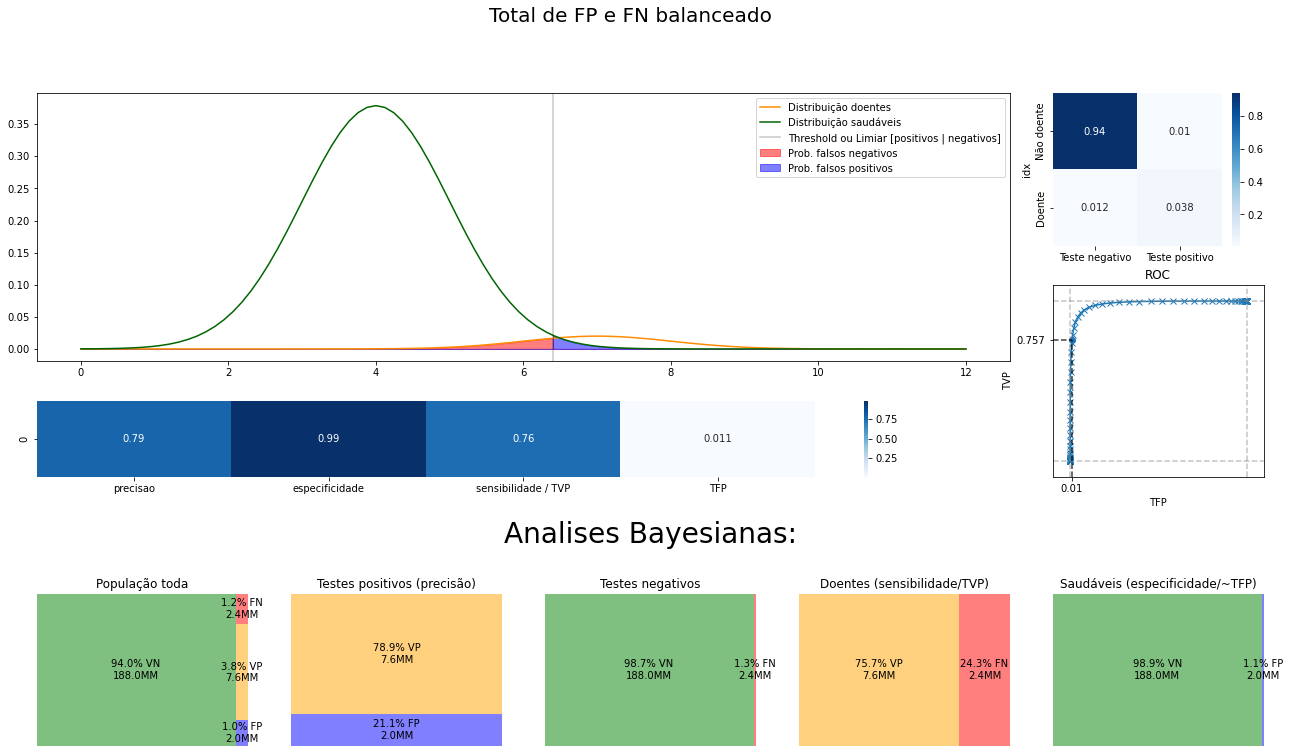

In [8]:
plot_pdfs(mu_doente=7, sigma_doente=1, mu_saudavel=4, sigma_saudavel=1, prop=0.05, threshold=6.4, fill_positives=False, title='Total de FP e FN balanceado')

- 25% Das pessoas doentes não estão sendo corretamente diagnosticadas

---

          Teste positivo Teste negativo   % da pop.
Real                                               
Positivo           4.76%          0.24%       5.00%
Negativo           8.67%         86.33%      95.00%
% da pop.         13.43%         86.57%     100.00%
----------------------------------------------------------------------------------------------------
Precision/PPV: 35.46%   NPV: 99.72%   sensitivity: 95.22%   specificity: 90.88%


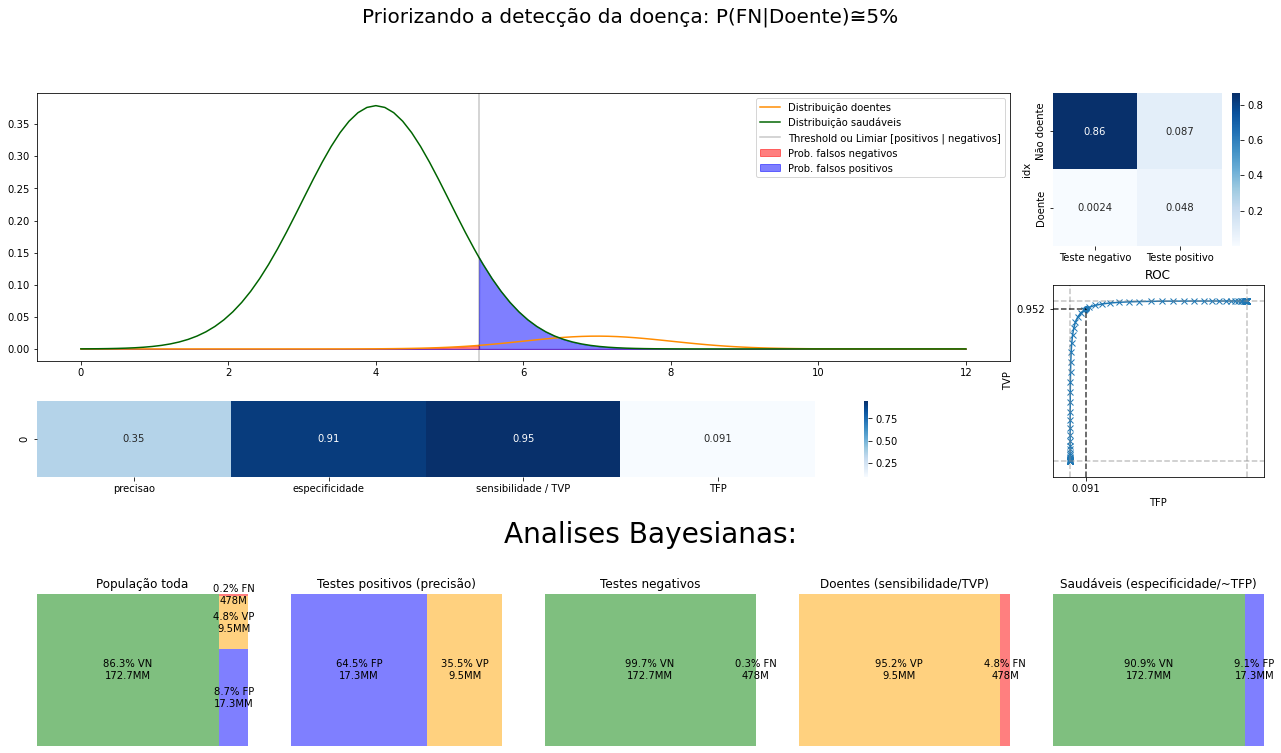

In [9]:
plot_pdfs(mu_doente=7, sigma_doente=1, mu_saudavel=4, sigma_saudavel=1, prop=0.05, threshold=5.4, fill_positives=False, title='Priorizando a detecção da doença: P(FN|Doente)≅5%')

- 65% testes positivos apresenta resultado equivocado

---

          Teste positivo Teste negativo   % da pop.
Real                                               
Positivo           4.52%          0.48%       5.00%
Negativo           4.26%         90.74%      95.00%
% da pop.          8.78%         91.22%     100.00%
----------------------------------------------------------------------------------------------------
Precision/PPV: 51.47%   NPV: 99.47%   sensitivity: 90.37%   specificity: 95.51%


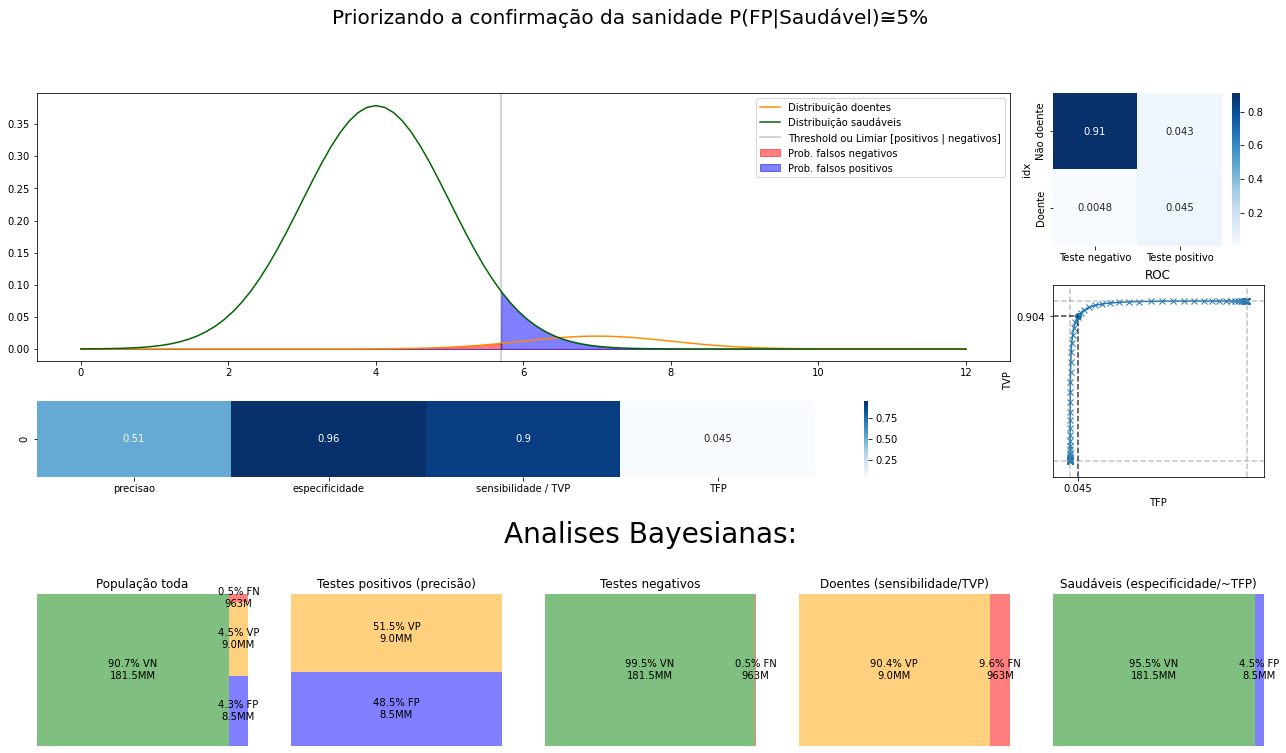

In [10]:
plot_pdfs(mu_doente=7, sigma_doente=1, mu_saudavel=4, sigma_saudavel=1, prop=0.05, threshold=5.7, fill_positives=False, title='Priorizando a confirmação da sanidade P(FP|Saudável)≅5%')

- Metade dos meus testes positivos apresenta resultado equivocado

---